In [3]:
import pandas as pd
james_bond_data = pd.read_csv("jamesbond.csv").convert_dtypes()
james_bond_data.head()

,Year,Movie,Bond,Director,Composer,Writer,Cinematographer,Depicted_Film_Loc,Shooting_Loc,Bond_Car_MFG,...,Film_Length,Avg_User_IMDB,Avg_User_Rtn_Tom,Conquests,Martinis,BJB,Kills_Bond,Kills_Others,Top_100,Video_Game
0,1962,Dr. No,Sean Connery,Terence Young,Monty Norman,"Richard Maibaum, Johanna Harwood & Berkely Mather",Ted Moore,"Great Britain, Jamaic","England, Jamaica",Sunbeam,...,110,7.3,7.7,3,2,1,4,8,0,0
1,1963,From Russia with Love,Sean Connery,Terence Young,John Barry,Richard Maibaum & Johanna Harwood,Ted Moore,"United Kingdom, Great Britain, Turkey, Croatia...","England, Scotland, Italy, Switzerland, Turkey",Bently,...,115,7.5,8.0,4,0,0,11,16,0,1
2,1964,Goldfinger,Sean Connery,Guy Hamilton,John Barry,Richard Maibaum & Paul Dehn,Ted Moore,"United States, Great Britain, Switzerland","England, Switzerland, United States",Aston Martin,...,110,7.8,8.4,2,1,2,9,68,1,1
3,1965,Thunderball,Sean Connery,Terence Young,John Barry,Richard Maibaum & John Hopkins,Ted Moore,"France, Great Britain, Bahamas, United States","England, France, Bahamas, United States",Aston Martin,...,130,7.0,6.8,3,0,0,20,90,1,0
4,1967,You Only Live Twice,Sean Connery,Lewis Gilbert,John Barry,Roald Dahl,Freddie Young,"United States, Russia, Kazakhstan, Norway, Japan","Japan, Spain, Norway",Toyota,...,117,6.9,6.3,3,1,0,21,175,1,0


In [11]:
new_column_names = {
"Release": "release_date",
"Movie": "movie_title",
"Bond": "bond_actor",
"Bond_Car_MFG": "car_manufacturer",
"US_Gross": "income_usa",
"World_Gross": "income_world",
"Budget": "movie_budget",
"Film_Length": "film_length",
"Avg_User_IMDB": "imdb",
"Avg_User_Rtn_Tom": "rotten_tomatoes",
"Martinis": "martinis_consumed",
"Kills_Bond": "bond_kills",
}

data = james_bond_data.rename(columns=new_column_names)
data.columns

Index(['Year', 'movie_title', 'bond_actor', 'Director', 'Composer', 'Writer',
       'Cinematographer', 'Depicted_Film_Loc', 'Shooting_Loc',
       'car_manufacturer', 'Bond_Girl_Nat', 'income_usa', 'US_Adj',
       'income_world', 'World_Adj', 'movie_budget', 'Budget_Adj',
       'film_length', 'imdb', 'rotten_tomatoes', 'Conquests',
       'martinis_consumed', 'BJB', 'bond_kills', 'Kills_Others', 'Top_100',
       'Video_Game'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               24 non-null     Int64  
 1   movie_title        24 non-null     string 
 2   bond_actor         24 non-null     string 
 3   Director           24 non-null     string 
 4   Composer           24 non-null     string 
 5   Writer             24 non-null     string 
 6   Cinematographer    24 non-null     string 
 7   Depicted_Film_Loc  24 non-null     string 
 8   Shooting_Loc       24 non-null     string 
 9   car_manufacturer   24 non-null     string 
 10  Bond_Girl_Nat      24 non-null     string 
 11  income_usa         24 non-null     Int64  
 12  US_Adj             24 non-null     Int64  
 13  income_world       24 non-null     Int64  
 14  World_Adj          24 non-null     Int64  
 15  Budget             24 non-null     Int64  
 16  Budget_Adj         24 non-nu

In [6]:
data.loc[data.isna().any(axis="columns")]

,Year,movie_title,bond_actor,Director,Composer,Writer,Cinematographer,Depicted_Film_Loc,Shooting_Loc,car_manufacturer,...,film_length,imdb,rotten_tomatoes,Conquests,martinis_consumed,BJB,bond_kills,Kills_Others,Top_100,Video_Game


In [8]:
data = james_bond_data.rename(columns=new_column_names).combine_first(pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}}))

In [9]:
pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}})

,imdb,rotten_tomatoes
10,7.1,6.8


In [12]:
data[["income_usa", "income_world", "movie_budget", "film_length"]].head()

,income_usa,income_world,movie_budget,film_length
0,16067035,59567035,1000,110
1,24800000,78900000,2000,115
2,51100000,124900000,3000,110
3,63600000,141200000,9000,130
4,43100000,111600000,9500,117


In [14]:
In [10]: data = (
        james_bond_data.rename(columns=new_column_names)
        .combine_first(
            pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}})
        )
        .assign(
            income_usa=lambda data: (
                data["income_usa"]
                .replace("[$,]", "", regex=True)
                .astype("Float64")
            ),
        )
    )
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 23
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BJB                24 non-null     Int64  
 1   Bond_Girl_Nat      24 non-null     string 
 2   Budget_Adj         24 non-null     Int64  
 3   Cinematographer    24 non-null     string 
 4   Composer           24 non-null     string 
 5   Conquests          24 non-null     Int64  
 6   Depicted_Film_Loc  24 non-null     string 
 7   Director           24 non-null     string 
 8   Kills_Others       24 non-null     Int64  
 9   Shooting_Loc       24 non-null     string 
 10  Top_100            24 non-null     Int64  
 11  US_Adj             24 non-null     Int64  
 12  Video_Game         24 non-null     Int64  
 13  World_Adj          24 non-null     Int64  
 14  Writer             24 non-null     string 
 15  Year               24 non-null     Int64  
 16  bond_actor         24 non-null   

In [15]:
data["bond_actor"].value_counts()


bond_actor
Roger Moore       7
Sean Connery      6
Pierce Brosnan    4
Daniel Craig      4
Timothy Dalton    2
George Lazenby    1
Name: count, dtype: Int64

In [16]:
data[["film_length", "martinis_consumed"]].describe()

,film_length,martinis_consumed
count,24.0,24.0
mean,126.833333,1.083333
std,10.961064,1.316011
min,106.0,0.0
25%,119.75,0.0
50%,127.5,1.0
75%,131.5,1.0
max,148.0,6.0


In [17]:
data.loc[data.duplicated(keep=False)]

,BJB,Bond_Girl_Nat,Budget_Adj,Cinematographer,Composer,Conquests,Depicted_Film_Loc,Director,Kills_Others,Shooting_Loc,...,bond_kills,car_manufacturer,film_length,imdb,income_usa,income_world,martinis_consumed,movie_budget,movie_title,rotten_tomatoes


In [18]:
data.to_csv("james_bond_data_cleansed.csv", index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11500\2875793536.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


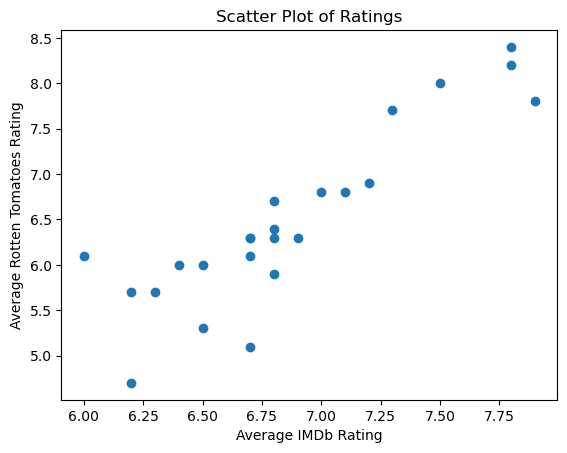

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
   
data = pd.read_csv("james_bond_data_cleansed.csv").convert_dtypes()
fig, ax = plt.subplots()
ax.scatter(data["imdb"], data["rotten_tomatoes"])
ax.set_title("Scatter Plot of Ratings")
ax.set_xlabel("Average IMDb Rating")
ax.set_ylabel("Average Rotten Tomatoes Rating")
fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11500\1550937666.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


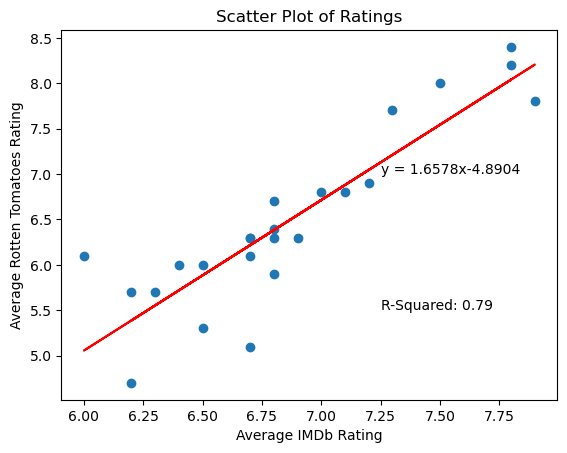

In [27]:
from sklearn.linear_model import LinearRegression
   
x = data.loc[:, ["imdb"]]
y = data.loc[:, "rotten_tomatoes"]
model = LinearRegression()
model.fit(x, y)
   
r_squared = f"R-Squared: {model.score(x, y):.2f}"
best_fit = f"y = {model.coef_[0]:.4f}x{model.intercept_:+.4f}"
y_pred = model.predict(x)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, y_pred, color="red")
ax.text(7.25, 5.5, r_squared, fontsize=10)
ax.text(7.25, 7, best_fit, fontsize=10)
ax.set_title("Scatter Plot of Ratings")
ax.set_xlabel("Average IMDb Rating")
ax.set_ylabel("Average Rotten Tomatoes Rating")
fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11500\2340875588.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


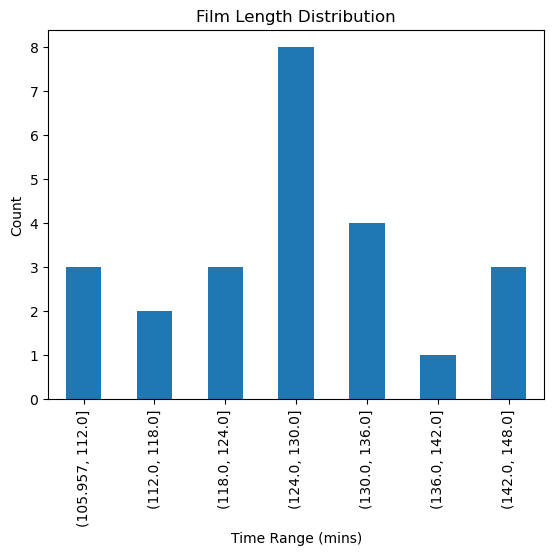

In [28]:
fig, ax = plt.subplots()
length = data["film_length"].value_counts(bins=7).sort_index()
length.plot.bar(
        ax=ax,
        title="Film Length Distribution",
        xlabel="Time Range (mins)",
        ylabel="Count",
    )
fig.show()